In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_regression, chi2, SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# ANOVA F-value For Feature Selection Data Pure

In [2]:
def anovaF(X,y,umbral):
    f_value = SelectKBest(f_classif)
    X_best = f_value.fit(X,y)
    fig, ax = plt.subplots(figsize = (20,10))
    scores = X_best.scores_
    print(scores)
    ax = plt.rcParams["figure.figsize"] = [24,18]
    ax = plt.plot(scores)
    plt.xticks(np.arange(30),np.arange(30), size = 15 )
    plt.yticks(size = 15)
    bestScore = lambda x: x >= umbral
    bestScore = pd.Series(bestScore(scores))
    return bestScore[bestScore].index


# ExtraTreesClassifier Data Pure

In [3]:
def treesClassifierData(X,y):
    clf = ExtraTreesClassifier(n_estimators = 36)
    clf = clf.fit(X,y)
    model = SelectFromModel(clf, prefit=True)
    best_features_segundo_metodo = X[X.columns[model.get_support(indices = True)]].columns
    return best_features_segundo_metodo

# LDA Data Pure

In [4]:
def ldaData(X,y):
    lda = LinearDiscriminantAnalysis(n_components=None)
    X_lda = lda.fit(X, y)
    X_lda
    model = SelectFromModel(X_lda, prefit=True)
    best_features_tercer_metodo = X[X.columns[model.get_support(indices = True)]].columns
    return best_features_tercer_metodo

# Load Data

### Data Pure

In [5]:
data_i = pd.read_csv('dataA.csv')
data_i.head(1)

,Netflows,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,Avg_pps,...,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,First_Protocol_ICMP,First_Protocol_ICMP6,First_Protocol_TCP,First_Protocol_UDP,Type_mine
0,-0.084787,-0.68541,-0.244709,-0.196223,0.361252,-0.132463,-0.625504,-0.317443,-0.359303,-0.336093,...,-0.343648,-0.398552,-0.417145,-0.476095,-0.558694,0,0,1,0,0


Anova, chi2, forward selection, backward selection, Recursive Feature Elimination, Lasso, Ridge

In [6]:
y = data_i['Type_mine']
X = data_i.drop(['Type_mine'],axis = 1)

### Select Feature


[1.23996745e+03 3.24139110e+03 2.95315609e+03 2.57767611e+03
 7.97065919e+02 1.72515471e+03 3.68146941e+03 5.71829006e+02
 6.19526438e+02 6.77530822e+02 7.07875293e+02 3.67863935e+02
 1.80115924e+03 1.66780763e+03 1.47530990e+03 3.99255590e+03
 6.04899666e+02 1.61621013e+03 3.80217718e+03 1.28265568e+02
 7.62578544e+02 8.28562385e+02 8.40761847e+02 1.13985255e+03
 1.53593789e+03 1.69627161e+03 8.92422734e-01 8.92422734e-01
 5.65872059e+02 5.63070929e+02]


Index(['p1_d', 'min_d', 'second_sp', 'second_dp'], dtype='object')

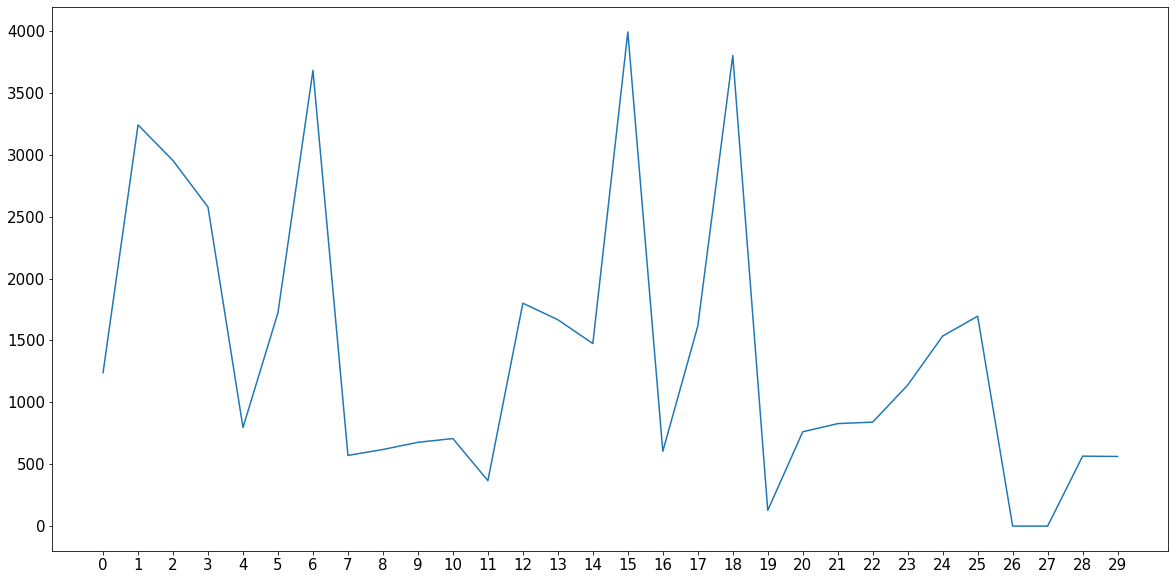

In [7]:
bestF1Me = anovaF(X,y,3000)
bestF1Me = data_i.columns[bestF1Me]
bestF1Me

In [8]:
bestF2Me = treesClassifierData(X,y)
bestF2Me

Index(['p1_d', 'p3_d', 'min_d', '#dp', 'first_sp', 'second_sp', 'first_dp',
       'second_dp', 'p2_ib', 'First_Protocol_UDP'],
      dtype='object')

In [9]:
bestF3Me = ldaData(X,y)
bestF3Me

Index(['min_d', '#sp', '#dp', 'first_sp', 'second_sp', 'first_dp', 'second_dp',
       'p1_ip', 'p3_ib', 'First_Protocol_ICMP6', 'First_Protocol_TCP',
       'First_Protocol_UDP'],
      dtype='object')

In [10]:
best_pure = np.concatenate([bestF1Me,bestF2Me,bestF3Me])
best_pure = np.unique(best_pure)
best_pure

array(['#dp', '#sp', 'First_Protocol_ICMP6', 'First_Protocol_TCP',
       'First_Protocol_UDP', 'first_dp', 'first_sp', 'min_d', 'p1_d',
       'p1_ip', 'p2_ib', 'p3_d', 'p3_ib', 'second_dp', 'second_sp'],
      dtype=object)

### Data No Pure

In [11]:
data_n = pd.read_csv('dataB.csv')
data_n.head(1)

,Netflows,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,Avg_pps,...,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,First_Protocol_ICMP,First_Protocol_ICMP6,First_Protocol_TCP,First_Protocol_UDP,Type_mine
0,4.553656,-0.037927,-0.055406,-0.142137,15.85042,-0.126105,-0.01812,43.732192,127.789591,32.184816,...,0.725482,5.594429,-0.046617,0.189553,3.916348,0,0,1,0,1


In [13]:
data_n = pd.concat([data_n, data_i[data_i['Type_mine'] == 0]], axis = 0)

In [14]:
import random
data_n = data_n.reset_index()
indices = list(data_n.index)
random.shuffle(indices)
data_n = data_n.reindex(indices)
data_n.head(1)

,index,Netflows,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,...,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,First_Protocol_ICMP,First_Protocol_ICMP6,First_Protocol_TCP,First_Protocol_UDP,Type_mine
30713,30713,-0.027435,-0.037927,-0.064791,-0.181777,-0.811166,-0.979657,-0.01812,-0.076155,-0.034248,...,-0.188257,-0.295768,-0.095017,-0.168736,-0.363409,0,1,0,0,1


In [15]:
y = data_n['Type_mine']
X = data_n.drop(['Type_mine','index'],axis = 1)

### Select Feature

[4.20924578e+02 9.04748790e+02 8.51899120e+02 7.78454318e+02
 2.90115236e+02 5.85129802e+02 9.76717833e+02 2.16062324e+02
 2.32207525e+02 2.51592304e+02 2.64850205e+02 1.43960198e+02
 5.63301556e+02 5.31528767e+02 5.27796516e+02 1.00044541e+03
 2.31312973e+02 5.65498383e+02 9.75834121e+02 5.40315863e+01
 3.09797252e+02 3.32563443e+02 3.36342540e+02 4.33305947e+02
 5.46873036e+02 5.87659932e+02 1.89324348e+01 1.69837209e+04
 1.22080021e+05 1.52562418e+02]


Index(['First_Protocol_ICMP6'], dtype='object')

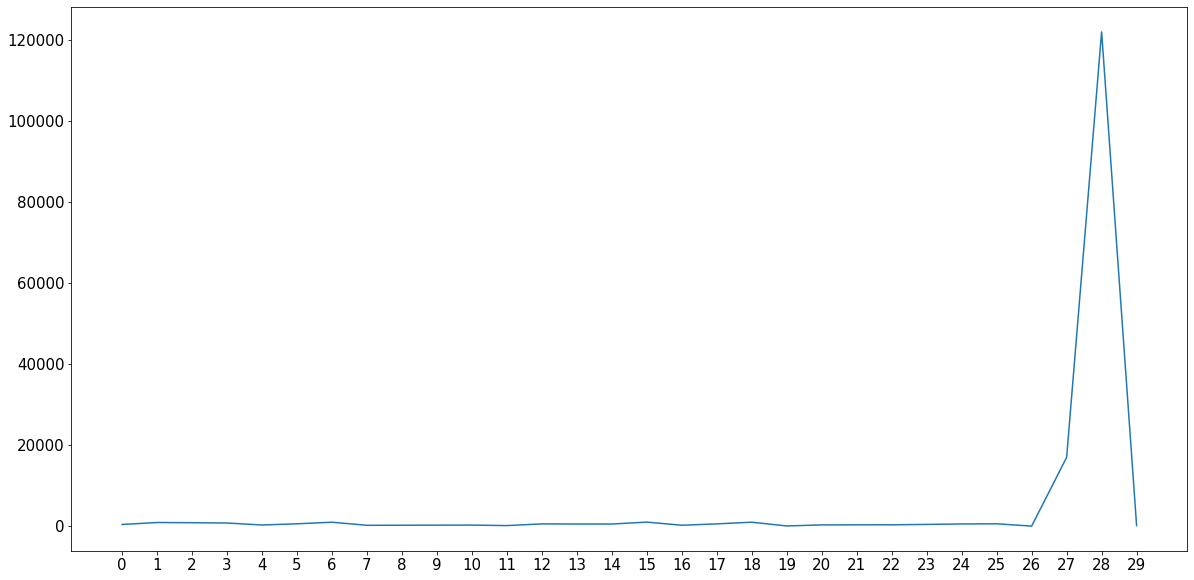

In [20]:
bestF1Me = anovaF(X,y,80000)
bestF1Me = data_n.columns[bestF1Me]
bestF1Me

In [17]:
bestF2Me = treesClassifierData(X,y)
bestF2Me

Index(['min_d', 'first_sp', 'first_dp', 'second_dp', 'p1_ib',
       'First_Protocol_ICMP6', 'First_Protocol_TCP', 'First_Protocol_UDP'],
      dtype='object')

In [18]:
bestF3Me = ldaData(X,y)
bestF3Me

Index(['First_Protocol_ICMP6', 'First_Protocol_TCP', 'First_Protocol_UDP'], dtype='object')

In [21]:
best_n_pure = np.concatenate([bestF1Me,bestF2Me,bestF3Me])
best_n_pure = np.unique(best_n_pure)
best_n_pure

array(['First_Protocol_ICMP6', 'First_Protocol_TCP', 'First_Protocol_UDP',
       'first_dp', 'first_sp', 'min_d', 'p1_ib', 'second_dp'],
      dtype=object)

In [22]:
best_pure

array(['#dp', '#sp', 'First_Protocol_ICMP6', 'First_Protocol_TCP',
       'First_Protocol_UDP', 'first_dp', 'first_sp', 'min_d', 'p1_d',
       'p1_ip', 'p2_ib', 'p3_d', 'p3_ib', 'second_dp', 'second_sp'],
      dtype=object)

In [23]:
best_n_pure

array(['First_Protocol_ICMP6', 'First_Protocol_TCP', 'First_Protocol_UDP',
       'first_dp', 'first_sp', 'min_d', 'p1_ib', 'second_dp'],
      dtype=object)